# Titanic Challenge - Machine Learning from disaster 
### (https://www.kaggle.com/competitions/titanic/overview)

### Exploring techniques such as Decision Trees, Random Forest, XGboost, CatBoost and comparing the results using the famous competition on kaggle.


### Importing data and packages

In [10]:
import pandas as pd

In [11]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# Checking qty of survives | 61% died in the train sample
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
549 / (342+549)

0.6161616161616161

## Feature Engineering

### Dealing with age values

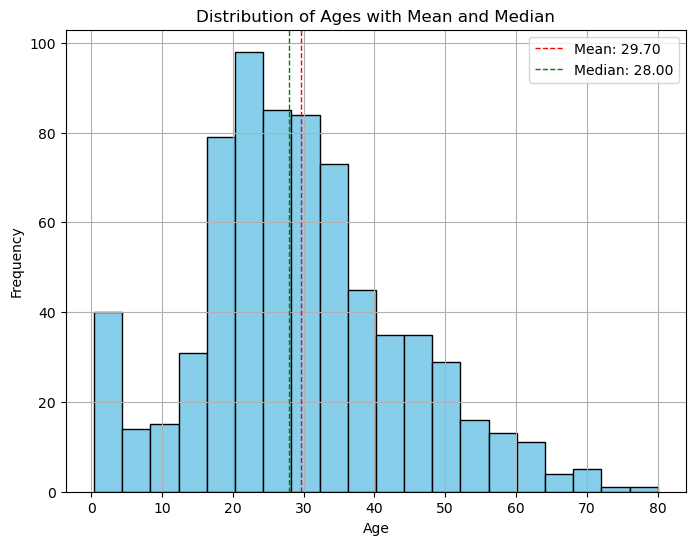

In [17]:
import matplotlib.pyplot as plt

# Calculate mean and median
mean_age = train['Age'].mean()
median_age = train['Age'].median()

# Plotting the distribution of ages with mean and median markers
plt.figure(figsize=(8, 6))
plt.hist(train['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_age:.2f}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages with Mean and Median')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Replace NaN values in 'Age' column with the calculated median
train['Age'].fillna(median_age, inplace=True)

In [19]:
# Replace NaN values in 'Age' column with the calculated median
test['Age'].fillna(median_age, inplace=True)

### Dealing with Cabin values

In [20]:
# Checking unique values in the 'Cabin' column
unique_cabins = train['Cabin'].unique()
print("Unique Cabin Values:")
print(unique_cabins)

Unique Cabin Values:
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [21]:
# Extracting the letters from non-NaN values in the 'Cabin' column and replacing NaN with 'N/A'
train['Cabin'] = train['Cabin'].fillna('N/A').str.extract(r'([A-Za-z])')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [22]:
test['Cabin'] = test['Cabin'].fillna('N/A').str.extract(r'([A-Za-z])')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,N,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,N,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,N,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,N,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,N,S


In [23]:
unique_cabins = train['Cabin'].unique()
print("Unique Cabin Values:")
print(unique_cabins)

Unique Cabin Values:
['N' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [24]:
unique_cabins_test = test['Cabin'].unique()
print("Unique Cabin Values:")
print(unique_cabins)

Unique Cabin Values:
['N' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


### Dealing with Ticket/Name variables

In [25]:
unique_ticket = train['Ticket'].unique()
print("Unique Ticket Values:")
print(unique_ticket)

Unique Ticket Values:
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '34924

In [26]:
columns_to_drop = ['Name', 'Ticket']  # droping columns
train.drop(columns=columns_to_drop, inplace=True, errors='ignore')

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,N,S
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,N,S
3,4,1,1,female,35.0,1,0,53.1000,C,S
4,5,0,3,male,35.0,0,0,8.0500,N,S


In [27]:
test.drop(columns=columns_to_drop, inplace=True, errors='ignore')

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,N,Q
1,893,3,female,47.0,1,0,7.0000,N,S
2,894,2,male,62.0,0,0,9.6875,N,Q
3,895,3,male,27.0,0,0,8.6625,N,S
4,896,3,female,22.0,1,1,12.2875,N,S


### Transforming columns

In [28]:
# Transforming specific columns into categorical data type
train['Pclass'] = train['Pclass'].astype('category')
train['SibSp'] = train['SibSp'].astype('category')
train['Parch'] = train['Parch'].astype('category')

# Transforming specific columns into factor data type
train['Sex'] = pd.factorize(train['Sex'])[0]
train['Cabin'] = pd.factorize(train['Cabin'])[0]
train['Embarked'] = pd.factorize(train['Embarked'])[0]

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,0
3,4,1,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,0,35.0,0,0,8.0500,0,0


In [29]:
# Transforming specific columns into categorical data type
test['Pclass'] = test['Pclass'].astype('category')
test['SibSp'] = test['SibSp'].astype('category')
test['Parch'] = test['Parch'].astype('category')

# Transforming specific columns into factor data type
test['Sex'] = pd.factorize(test['Sex'])[0]
test['Cabin'] = pd.factorize(test['Cabin'])[0]
test['Embarked'] = pd.factorize(test['Embarked'])[0]

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,34.5,0,0,7.8292,0,0
1,893,3,1,47.0,1,0,7.0000,0,1
2,894,2,0,62.0,0,0,9.6875,0,0
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,1


## Training and predictions

### Decision Tree

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [31]:
predictors = ["Survived", "Pclass", "Sex", "Age", 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [32]:
# Define your features (X) and target variable (y)
X_dt = train.drop('Survived', axis=1)  # Features
X_dt = train[predictors]
y_dt = train['Survived']  # Target variable

# Split the dataset into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.6, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
clf.fit(X_train_dt, y_train_dt)

# Make predictions
y_pred_dt = clf.predict(X_test_dt)



In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test_dt, y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [34]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test_dt, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       1.00      1.00      1.00       211

    accuracy                           1.00       535
   macro avg       1.00      1.00      1.00       535
weighted avg       1.00      1.00      1.00       535



In [35]:
# Running in the actual datasets
X_train = train.drop('Survived', axis=1)  # Features in the training set
y_train = train['Survived']  # Target variable in the training set

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
# Assuming test set doesn't contain 'Survived' column
predicted_survived = clf.predict(test)

# Add the predicted 'Survived' column to the test dataset
test_dt_final = test.copy()
test_dt_final['Survived'] = predicted_survived

In [36]:
test_dt_final.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,0,0,0
1,893,3,1,47.0,1,0,7.0000,0,1,0
2,894,2,0,62.0,0,0,9.6875,0,0,0
3,895,3,0,27.0,0,0,8.6625,0,1,0
4,896,3,1,22.0,1,1,12.2875,0,1,0
5,897,3,0,14.0,0,0,9.2250,0,1,1
6,898,3,1,30.0,0,0,7.6292,0,0,1
7,899,2,0,26.0,1,1,29.0000,0,1,0
8,900,3,1,18.0,0,0,7.2292,0,2,1
9,901,3,0,21.0,2,0,24.1500,0,1,1


In [51]:
# Checking qty of survives | 61% died in the train sample | 58% died in test set RF
test_dt_final['Survived'].value_counts()

0    243
1    175
Name: Survived, dtype: int64

In [52]:
243 / (175+243)

0.5813397129186603

In [57]:
dt_submission = test_dt_final[['PassengerId','Survived']]
dt_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [58]:

# Save DataFrame to a CSV file
dt_submission.to_csv('dt_submission.csv', index=False)

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=42)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,0
3,4,1,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,0,35.0,0,0,8.0500,0,0


In [40]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,34.5,0,0,7.8292,0,0
1,893,3,1,47.0,1,0,7.0000,0,1
2,894,2,0,62.0,0,0,9.6875,0,0
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,1


In [41]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [42]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [43]:
median_fare = train['Fare'].median()
# Replace NaN values in 'Fare' column with the calculated median
test['Fare'].fillna(median_fare, inplace=True)

In [66]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [45]:
rf.fit(train[predictors], train["Survived"])

RandomForestClassifier(min_samples_split=10, random_state=42)

In [53]:
# Define your features (X) and target variable (y)
X_rf = train.drop('Survived', axis=1)  # Features
X_rf = train[predictors]
y_rf = train['Survived']  # Target variable

# Split the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.8, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
clf.fit(X_train_rf, y_train_rf)

# Make predictions
y_pred_rf = clf.predict(X_test_rf)

In [54]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [55]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       1.00      1.00      1.00       277

    accuracy                           1.00       713
   macro avg       1.00      1.00      1.00       713
weighted avg       1.00      1.00      1.00       713



In [46]:
# Separate features and target variable in the training set
X_train_rf = train.drop('Survived', axis=1)  # Features in the training set
y_train_rf = train['Survived']  # Target variable in the training set

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
# Assuming test set doesn't contain 'Survived' column
predicted_survived_rf = rf_clf.predict(test)

# Add the predicted 'Survived' column to the test dataset
test_rf = test.copy()
test_rf['Survived'] = predicted_survived_rf

In [48]:
test_rf.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,0,0,0
1,893,3,1,47.0,1,0,7.0000,0,1,0
2,894,2,0,62.0,0,0,9.6875,0,0,0
3,895,3,0,27.0,0,0,8.6625,0,1,0
4,896,3,1,22.0,1,1,12.2875,0,1,0
5,897,3,0,14.0,0,0,9.2250,0,1,0
6,898,3,1,30.0,0,0,7.6292,0,0,0
7,899,2,0,26.0,1,1,29.0000,0,1,0
8,900,3,1,18.0,0,0,7.2292,0,2,0
9,901,3,0,21.0,2,0,24.1500,0,1,0


In [49]:
# Checking qty of survives | 61% died in the train sample | 68% died in test set
test_rf['Survived'].value_counts()

0    287
1    131
Name: Survived, dtype: int64

In [50]:
287 / (131+287)

0.6866028708133971

In [59]:
rf_submission = test_rf[['PassengerId','Survived']]
rf_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [88]:
# Save DataFrame to a CSV file
rf_submission.to_csv('rf_submission.csv', index=False)

### XGboost

In [63]:
test_xg

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,2,0,34.5,0,0,7.8292,0,0
1,893,2,1,47.0,1,0,7.0000,0,1
2,894,1,0,62.0,0,0,9.6875,0,0
3,895,2,0,27.0,0,0,8.6625,0,1
4,896,2,1,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,2,0,28.0,0,0,8.0500,0,1
414,1306,0,1,39.0,0,0,108.9000,4,2
415,1307,2,0,38.5,0,0,7.2500,0,1
416,1308,2,0,28.0,0,0,8.0500,0,1


In [79]:
train_xg = train.copy()
test_xg = test.copy()

In [80]:
import xgboost as xgb

# Separate features and target variable in the training set
X_train_xg = train_xg.drop('Survived', axis=1)  # Features in the training set
y_train_xg = train_xg['Survived']  # Target variable in the training set

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, enable_categorical = True)
xgb_model.fit(X_train_xg, y_train_xg)

# Make predictions on the test set
# Assuming test set doesn't contain 'Survived' column
predicted_survived = xgb_model.predict(test_xg)

# Add the predicted 'Survived' column to the test dataset
test_xg['Survived'] = predicted_survived

test_xg.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,0,0,0
1,893,3,1,47.0,1,0,7.0000,0,1,0
2,894,2,0,62.0,0,0,9.6875,0,0,0
3,895,3,0,27.0,0,0,8.6625,0,1,0
4,896,3,1,22.0,1,1,12.2875,0,1,1


In [82]:
# Checking qty of survives | 61% died in the train sample | 67% died in test set
test_xg['Survived'].value_counts()

0    280
1    138
Name: Survived, dtype: int64

In [83]:
280/ (138+280)

0.6698564593301436

In [85]:
xg_submission = test_xg[['PassengerId','Survived']]
xg_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [87]:
# Save DataFrame to a CSV file
xg_submission.to_csv('xg_submission.csv', index=False)

### Catboost

In [93]:
from catboost import CatBoostClassifier

train_cb = train.copy()
test_cb = test.copy()

# Separate features and target variable in the training set
X_train_cb = train_cb.drop('Survived', axis=1)  # Features in the training set
y_train_cb = train_cb['Survived']  # Target variable in the training set

# Separate features and (possibly unseen) target variable in the test set
X_test_cb = test_cb  # Features in the test set (no 'Survived' column)

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=1000,  # Specify number of iterations
                                    learning_rate=0.1,  # Specify learning rate
                                    depth=6,  # Specify depth
                                    loss_function='Logloss',  # Specify loss function
                                    random_state=42,  # Specify random state for reproducibility
                                    verbose=100)  # Set verbose to monitor training progress

# Fit the model on the train set
catboost_model.fit(X_train, y_train, cat_features=['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'])

# Make predictions on the test set
predicted_survived = catboost_model.predict(X_test_cb)

# Add the predicted 'Survived' column to the test dataset
test_cb['Survived'] = predicted_survived

# Now 'test_data' contains the 'Survived' column with predicted values
test_cb.head(15)


0:	learn: 0.6402832	total: 163ms	remaining: 2m 42s
100:	learn: 0.2693528	total: 2.6s	remaining: 23.1s
200:	learn: 0.1808271	total: 5.28s	remaining: 21s
300:	learn: 0.1273024	total: 7.62s	remaining: 17.7s
400:	learn: 0.0967107	total: 9.96s	remaining: 14.9s
500:	learn: 0.0750096	total: 12.6s	remaining: 12.6s
600:	learn: 0.0593081	total: 15.6s	remaining: 10.3s
700:	learn: 0.0493491	total: 18.2s	remaining: 7.75s
800:	learn: 0.0419463	total: 20.6s	remaining: 5.11s
900:	learn: 0.0358096	total: 23s	remaining: 2.53s
999:	learn: 0.0311049	total: 25.6s	remaining: 0us


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,0,0,0
1,893,3,1,47.0,1,0,7.0000,0,1,0
2,894,2,0,62.0,0,0,9.6875,0,0,0
3,895,3,0,27.0,0,0,8.6625,0,1,0
4,896,3,1,22.0,1,1,12.2875,0,1,0
5,897,3,0,14.0,0,0,9.2250,0,1,0
6,898,3,1,30.0,0,0,7.6292,0,0,0
7,899,2,0,26.0,1,1,29.0000,0,1,0
8,900,3,1,18.0,0,0,7.2292,0,2,1
9,901,3,0,21.0,2,0,24.1500,0,1,0


In [94]:
# Checking qty of survives | 61% died in the train sample | 67% died in test set
test_cb['Survived'].value_counts()

0    282
1    136
Name: Survived, dtype: int64

In [95]:
282 / (282+136)

0.6746411483253588

In [96]:
cb_submission = test_cb[['PassengerId','Survived']]
cb_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [97]:
# Save DataFrame to a CSV file
cb_submission.to_csv('cb_submission.csv', index=False)

## Results Dec/23
Decision Trees: 0.67703 | 
Random Forest: 0.75358 | 
XGboost: 0.76076 | 
CatBoost: 0.75119 | 